### 比较Annotion与unAnnotion转录本表达水平的差异



0.29284551397900976
Ttest_indResult(statistic=91.59895981915172, pvalue=0.0)
Ttest_indResult(statistic=91.59895981915172, pvalue=0.0)


/public/home/zpliu/miniconda3/envs/jupyter/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


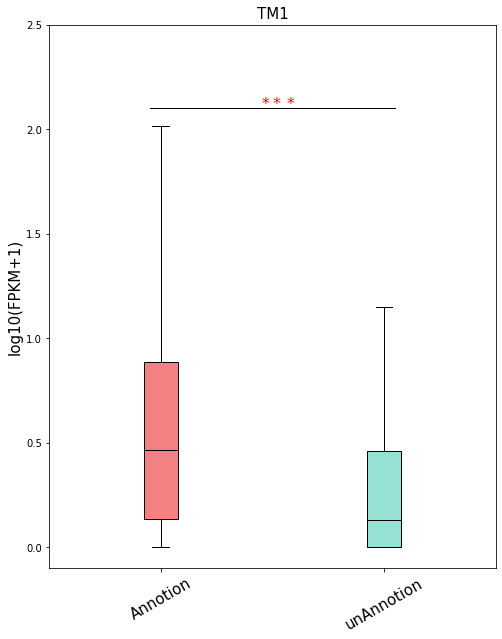

In [20]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt 
def getisoformLengtArray(file):
    with open(file,'r') as File:
        tmp=[]
        for line in File.readlines():
            tmp.append(line.split("\t")[-2])
        
        return [math.log(float(i)+1,10) for i in tmp]
            
Annotion=getisoformLengtArray('/public/home/zpliu/work/Alternative/result/Gh_result/CO31_32_result/collapse/PacBio_Annotion/Annotion_isoform_FPKM')
unAnnotion=getisoformLengtArray('/public/home/zpliu/work/Alternative/result/Gh_result/CO31_32_result/collapse/PacBio_Annotion/unAnnotion_isoform_FPKM')
plotdata=[Annotion,unAnnotion]
print(Annotion[0])
fig, ax = plt.subplots(figsize=(8, 10))

boxplot1=ax.boxplot(plotdata,
          notch=False,
           showfliers=False, ##隐藏异常值
            patch_artist=True, ##修改颜色填充
            boxprops = {'color':'black'}, ##设置边框颜色
            medianprops={'color':'black'} ##设置均值的颜色
           
          )
ax.set_ylim(ymax=2.5)
'''
设置y轴title
'''
ax.set_ylabel(
    'log10(FPKM+1)',
    fontdict={
        'size':'15'
    }
)
ax.set_xticklabels(
    ['Annotion','unAnnotion'],
    fontdict={
        'size':'15',
        'rotation':'30', ##旋转45度
    }
                  )
ax.set_title('TM1',
             fontdict={
        'size':'15'
    })
ax.plot()

print(stats.ttest_ind(Annotion,unAnnotion,equal_var = False)) 
print(stats.ttest_ind(Annotion,unAnnotion,equal_var = False)) 
'''
绘制直线的位置
x轴坐标
y轴坐标
'''
x=np.arange(0.95,2.15,0.1)
y=2.1+0*x
ax.plot(x,y,label="$y$",color="black",linewidth=1)

'''
添加显著性标记
'''
ax.annotate(r'$***$',
            xy=(1.45,2.11),
            #textcoords='offset points',
            fontsize=16,
            color="red"
           )



###设置填充色
colors=['#f38181','#95e1d3']
for patch,color in zip(boxplot1['boxes'],colors):
    patch.set_facecolor(color)

    
'''
保存图片
'''
fig.savefig('/public/home/zpliu/work/Alternative/result/Gh_result/CO31_32_result/collapse/PacBio_Annotion/Annotion_vs_unAnnotion_FPKM.png', dpi=150, bbox_inches="tight")